In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import LogNorm
import numpy as np

In [11]:
import sys
import os
sys.path.append(os.path.abspath('../Scripts'))

import Bulkparameters
import TH_parameters 
from cactusHandler import parse_cactus_file

In [12]:
BLK_FILE = '../data/BLK/*.cdf'
TH1_FILE = '../data/TH1/*.cdf'
INVALID = -1e31

In [13]:
time, density, bulk_speed, thermal_speed = Bulkparameters.loadfiles(BLK_FILE, INVALID)
thtime, energy, flux = TH_parameters.loadfiles(TH1_FILE)

In [14]:
filtered_cme_times = parse_cactus_file("../data/cmecat.txt")

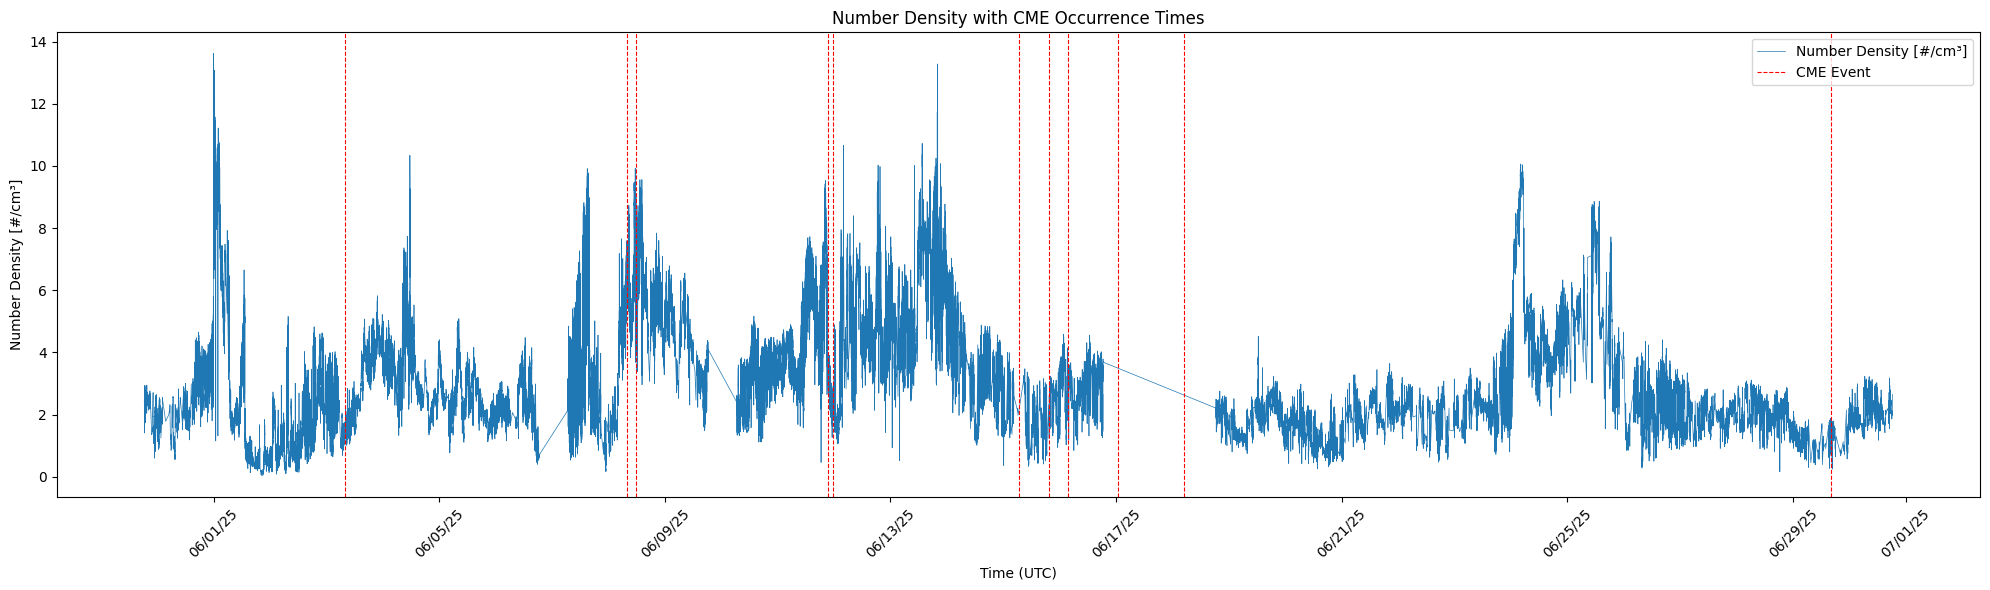

In [15]:
fig, ax = plt.subplots(figsize=(20, 6))

# Plot number density
ax.plot(time, density, label="Number Density [#/cm³]", linewidth=0.5)

# Plot CME times as vertical lines
for idx, t in enumerate(filtered_cme_times):
    ax.axvline(x=t, color='red', linestyle='--', linewidth=0.8, label="CME Event" if idx == 0 else "")

# Formatting
ax.set_title('Number Density with CME Occurrence Times')
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Number Density [#/cm³]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

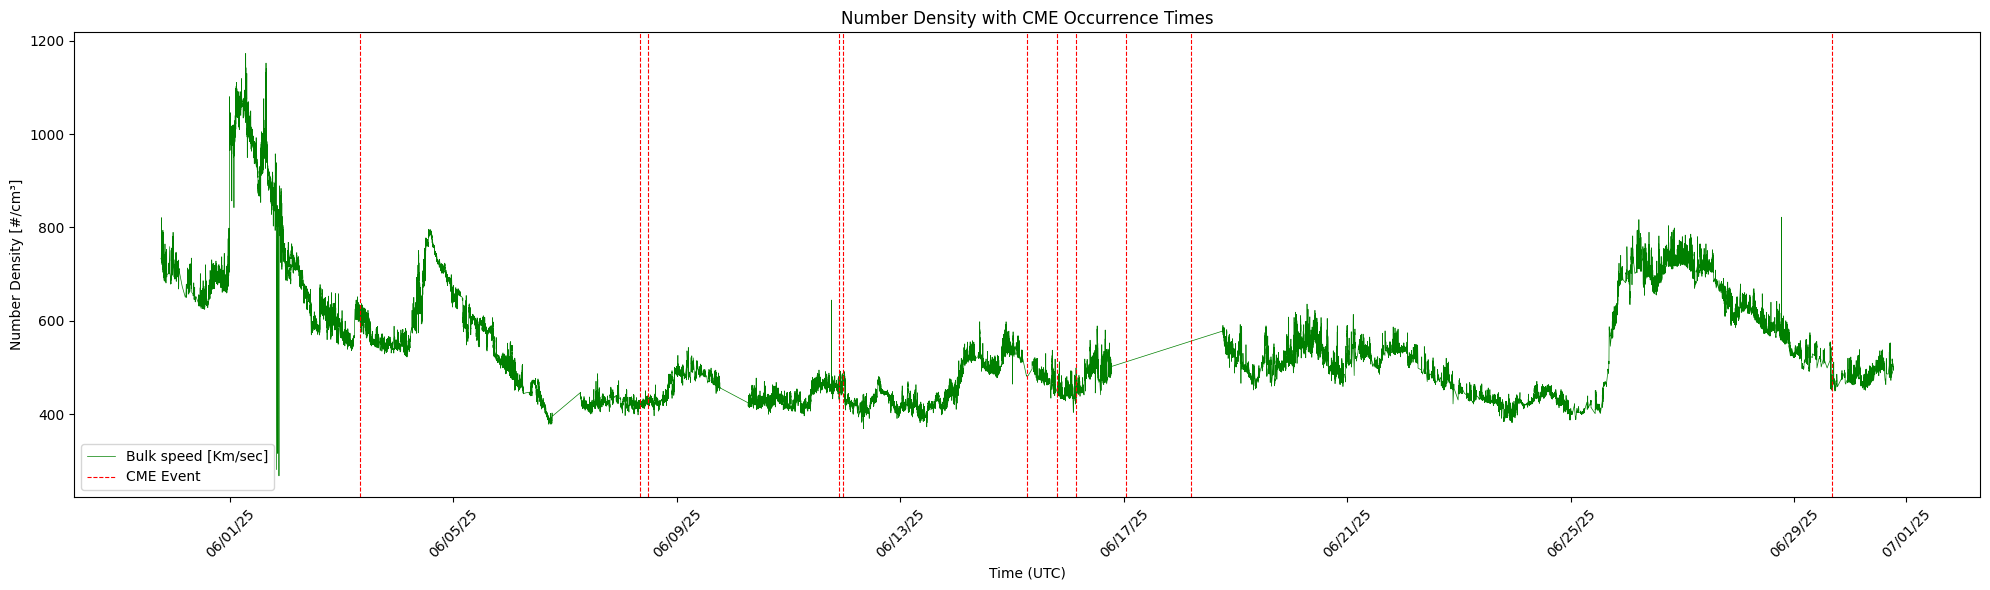

In [16]:
fig, ax = plt.subplots(figsize=(20, 6))

# Plot number density
ax.plot(time, bulk_speed, label="Bulk speed [Km/sec]", linewidth=0.5, color='green')

# Plot CME times as vertical lines
for idx, t in enumerate(filtered_cme_times):
    ax.axvline(x=t, color='red', linestyle='--', linewidth=0.8, label="CME Event" if idx == 0 else "")

# Formatting
ax.set_title('Number Density with CME Occurrence Times')
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Number Density [#/cm³]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

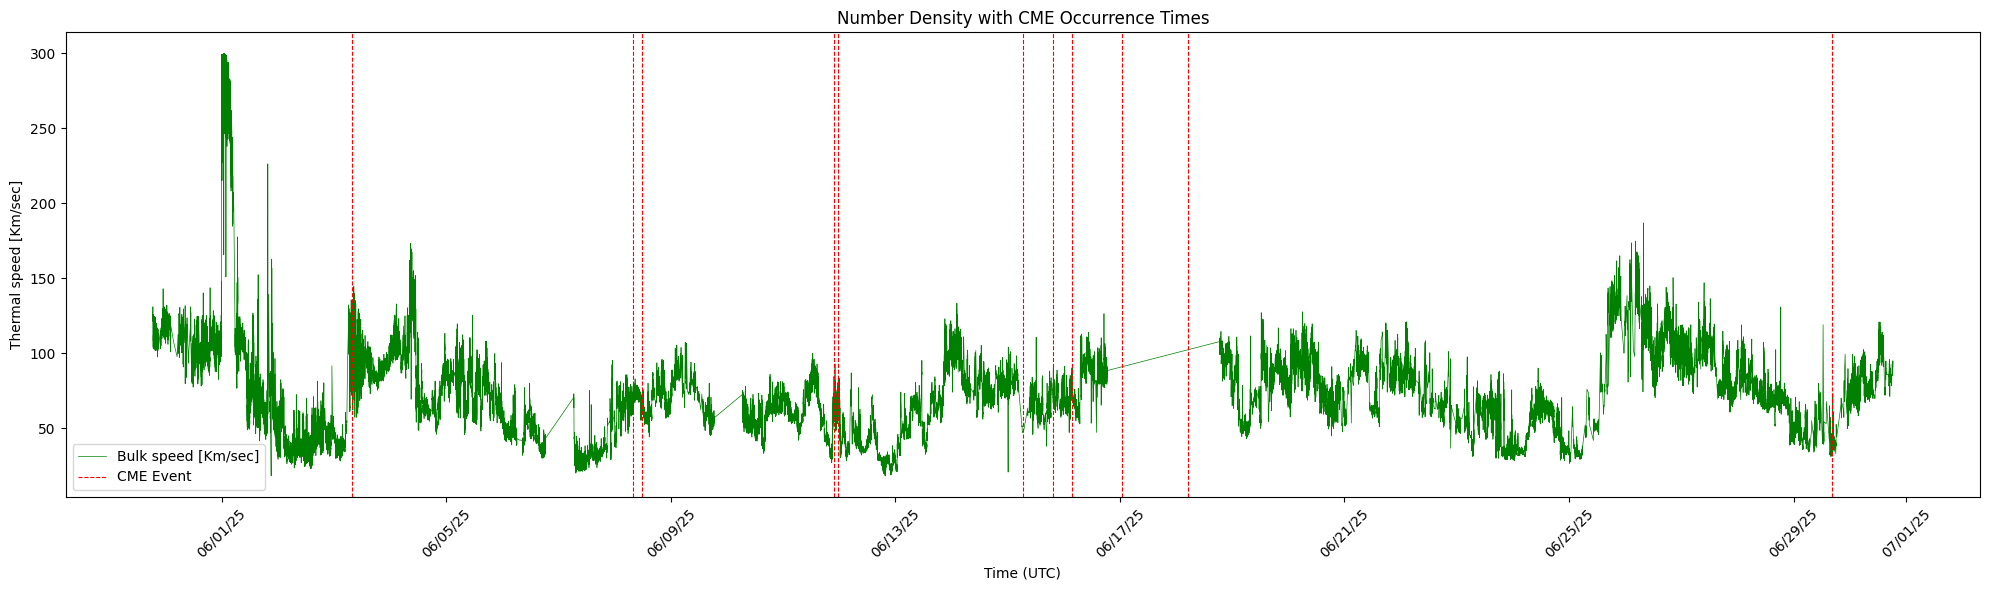

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))

# Plot number density
ax.plot(time, thermal_speed, label="Bulk speed [Km/sec]", linewidth=0.5, color='green')

# Plot CME times as vertical lines
for idx, t in enumerate(filtered_cme_times):
    ax.axvline(x=t, color='red', linestyle='--', linewidth=0.8, label="CME Event" if idx == 0 else "")

# Formatting
ax.set_title('Number Density with CME Occurrence Times')
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Thermal speed [Km/sec]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%D'))

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

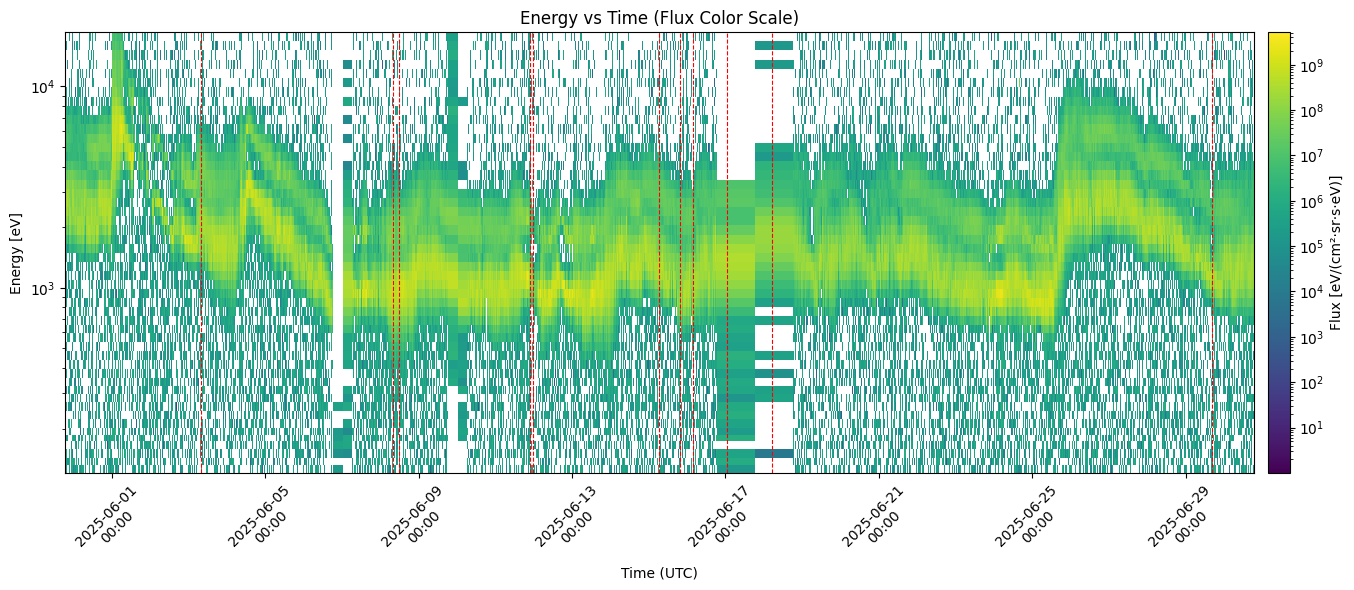

In [18]:
time_grid, energy_grid = np.meshgrid(thtime, energy[0], indexing='ij')

fig, ax = plt.subplots(figsize=(15, 6))
pcm = ax.pcolormesh(time_grid, energy_grid, flux, shading='auto', cmap='viridis', norm=LogNorm())
ax.set_yscale('log')

for idx, t in enumerate(filtered_cme_times):
    ax.axvline(x=t, color='red', linestyle='--', linewidth=0.8, label="CME Event" if idx == 0 else "")

ax.set_ylabel("Energy [eV]")
ax.set_xlabel("Time (UTC)")
ax.set_title("Energy vs Time (Flux Color Scale)")

# X-axis formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
plt.xticks(rotation=45)

# Colorbar
cbar = fig.colorbar(pcm, ax=ax, label="Flux [eV/(cm²·sr·s·eV)]", pad=0.01)
plt.tight_layout()
plt.show()